<a href="https://colab.research.google.com/github/ValentinaCorredor/Taller-finanzas-computacionales/blob/main/Trabajo_final_Calder%C3%B3n_y_Corredor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats.mstats import gmean
import warnings
import math
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import pandas_datareader.data as wb
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
!pip install --quiet pyDOE
from pyDOE import lhs

Debemos presentar un informe de mínimo 500 palabras que contenga:

1. Descripción del problema, justificación y objetivos
2. Manejo de datos
3. Análisis de datos
4. Implementación del modelo y análisis de resultados 



Grupo Nutresa S.A es la empresa líder de alimentos procesados en Colombia, tiene el 53.7% de participación de mercado y es una de las compañías más importantes del sector en América Latina. A su vez, se ubica como la empresa de alimentos más sostenible del mundo y es la segunda mejor empresa en reputación y en atraer y retener talento del país según MERCO Talento 2022 (Grupo Nutresa, 2022).


Además, es una empresa que tiene presencia en 17 países y sus ventas internacionales superan los 1.300 millones de USD en 82 países. Por otro lado, Nutresa cuenta con 8 líneas de negocio, las cuales son: Cárnicos, Galletas, Chocolates, Cafés, Tresmontes Lucchetti (TMLUC), alimentos al consumidor, healdos, pastas y otros. 

Por lo mencionado anteriormente, Nutresa ha captado la atención de muchos inversores, los cuales han buscado nuestra ayuda para saber si el precio de la acción de Nutresa está subvalorado, sobrevalorado o a precio justo. Para ello, se hará una valoración de la empresa por el método de flujo de caja descontado, con el fin de predicir el desempeño futuro de la empresa y calcular el valor presente de ella. Por ende, es necesario proyectar algunos indicadores financieros y cuentas del Estado integral de resultados. Posteriormente, se sensibilizarán las proyecciones bajo diferentes escenarios y se explicarán los impactos de un cambio en las siguientes variables: 


1. IPC 
2. Tx 
3. TRM


En este sentido, los objetivos del presente informe son:
1. Valorar la acción del Grupo Nutresa S.A
2. Simular el valor de la acción en diferentes escenarios
 

Para cumplir con los objetivos mencionados anteriormente, se calcularon los indicadores financieros de la firma de 2014 a 2022, basados en los datos que la empresa publica en sus earnings release y los indicadores macroeconómicos del banco mundial y el DANE.

Además, se tomaron las proyecciones macroeconómicas de Bancolombia de 2023 a 2027 para el IPC y TRM



In [403]:
#Indicadores macroeconómicos de 2014 a 2021
PIBreal=pd.DataFrame([0.045,0.03,0.021,0.014,0.026,0.032,-0.07,0.107,0.075])
IPCreal=pd.DataFrame([0.029,0.05,0.075,0.043,0.032,0.035,0.025,0.035,0.1312])
Año=(2014,2015,2016,2017,2018,2019,2020,2021,2022)
TasaBRreal=pd.DataFrame([0.045,0.045,0.0775,0.0575,0.0425,0.0425,0.0225,0.0175,0.0175])
acciones= 457755869 


In [404]:
#Proyecciones indicadores macroeconómicos
Años=(2023,2024,2025,2026,2027)
PIB=pd.DataFrame([0.006,0.016,0.025,0.028,0.028])
PIB.index=Años
IPC=pd.DataFrame([0.116,0.067,0.044,0.038,0.034])
IPC.index=Años
TasaBR=pd.DataFrame([0.115,0.075,0.065,0.06,0.06])
TRM=pd.DataFrame([0.108,-0.019,-0.006,0.007,0.008]) #Crecimiento de la TRM
TRM.index=Años

In [405]:
#Estado Integral de resultados
datos_ER=pd.DataFrame(pd.read_excel("FC_Trabajo_Final.xlsx"))
datos_ER


,Cuenta Contable,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Ingresos netos por ventas,6481813.00,7945417.28,8676639.89,8695603.54,9016066.49,9958851.22,11127541.50,1.286661e+07,17037823
1,Costo de mercancías vendidas,-3618717.00,-4507166.29,-4966030.58,-4855633.84,-4969218.01,-5565300.07,-6465128.44,-7.583054e+06,-10799595
2,Utilidad Bruta,2863096.00,3438250.99,3710609.31,3839969.70,4046848.48,4393551.15,4662413.06,5.283552e+06,6238228
3,Gastos administrativos,-328368.00,-2653757.32,-2933660.48,-3090808.77,-3204094.80,-3460095.62,-3655267.02,-4.059228e+06,-4806136
4,Otros ingresos operativos,0.00,2618.80,38022.42,25364.01,6542.20,26165.60,12441.55,2.810000e+04,53995
5,Otros gastos operativos,-149310.00,-4426.99,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0
6,Participación en ganancia (pérdida) de asociados,3222.00,4928.06,6102.72,5994.46,-399.58,-2268.34,-4472.00,9.038000e+03,20413
7,Gastos de venta y distribución,-1709315.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0
8,Utilidad Operacional,679325.00,787613.54,821073.97,780519.40,848896.30,957352.79,1015115.59,1.261462e+06,1506500
9,Ingresos financieros,11872.00,9827.77,10982.28,13941.19,15457.12,22293.62,24022.19,3.346400e+04,59891


In [406]:
#Estado de situación financiera
datos_ES=pd.DataFrame(pd.read_excel("FC_Trabajo_Final.xlsx",sheet_name=1))
datos_ES


,Cuenta Contable,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Efectivo o Equivalentes,391863.00,286063.59,219321.83,435642.61,347519.68,497946.81,933563.63,862705.00,1060247.0
1,Comerciales y otras cuentas a cobrar,739808.00,878279.78,889197.04,957568.27,1020579.28,1166248.37,1191710.89,1382671.00,1856746.0
2,Inventarios,841852.00,1032969.55,1028417.22,982816.07,1109877.77,1248127.67,1379983.93,1742562.00,3004244.0
3,Activos biológicos corrientes,47770.00,53118.72,75677.34,81517.75,94569.17,96631.54,127614.17,191894.00,259373.0
4,Otros Activos Corrientes,139352.00,292441.18,347161.40,228032.86,248502.66,254007.47,228264.35,414932.00,619202.0
5,Total Activos Corrientes,2160645.00,2542872.82,2559774.83,2685577.56,2821048.56,3262961.86,3861136.97,4594764.00,6799812.0
6,Comerciales y otras cuentas a cobrar no corrie...,23124.00,26729.44,23494.81,26508.55,28064.72,25408.59,26548.05,34794.00,47527.0
7,Activos biológicos no corrientes,4185.00,5698.99,7432.99,0.00,0.00,0.01,0.00,19484.00,11379.0
8,Activos diferidos,297783.00,355460.60,356993.90,415072.19,379752.76,654496.24,740891.40,810476.00,916772.0
9,Activos financieros a largo plazo,4196065.00,3609563.56,4121558.18,4386719.11,3592551.89,3784616.30,2884545.02,3246024.00,2976236.0


In [407]:
#Indicadores financieros
datos_indicadores=pd.DataFrame(pd.read_excel("FC_Trabajo_Final.xlsx",sheet_name=2))
datos_indicadores


,Indicador,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Margen bruto,4.417122e-01,4.327338e-01,4.276551e-01,4.415990e-01,4.488486e-01,4.411705e-01,4.189976e-01,4.106407e-01,3.661400e-01
1,M. OPERACIONAL,1.048048e-01,9.912803e-02,9.463041e-02,8.976023e-02,9.415373e-02,9.613085e-02,9.122550e-02,9.804156e-02,8.842092e-02
2,D&A,3.000000e-02,2.000000e-02,2.000000e-02,3.000000e-02,3.000000e-02,4.000000e-02,4.000000e-02,2.000000e-02,3.000000e-02
3,ROA,3.474372e-02,3.269218e-02,2.917551e-02,2.965451e-02,3.761956e-02,3.281773e-02,3.757552e-02,5.009407e-02,4.353991e-02
4,ROS,6.334339e-02,5.422236e-02,4.606524e-02,4.879942e-02,5.642766e-02,5.155627e-02,5.246837e-02,6.601734e-02,5.304475e-02
5,ROE,5.112010e-02,5.356554e-02,4.766766e-02,4.741139e-02,6.104044e-02,5.911909e-02,7.070776e-02,9.394034e-02,8.433509e-02
6,Razon corriente,1.526141e+00,1.130617e+00,1.210889e+00,1.373725e+00,1.381019e+00,1.389774e+00,1.582005e+00,1.748364e+00,1.785330e+00
7,Endeudamiento total,3.203510e-01,3.896789e-01,3.879392e-01,3.745278e-01,3.836944e-01,4.448878e-01,4.685800e-01,4.667460e-01,4.837273e-01
8,Apalancamiento total,4.713477e-01,6.384817e-01,6.338246e-01,5.987920e-01,6.225717e-01,8.014377e-01,8.817507e-01,8.752789e-01,9.369609e-01
9,Rotación CXC,4.296177e+01,4.157470e+01,3.839419e+01,4.130686e+01,4.245256e+01,4.367520e+01,3.996071e+01,4.021066e+01,4.079510e+01


In [408]:
#FCF
FCF=pd.DataFrame(pd.read_excel("FC_Trabajo_Final.xlsx",sheet_name=3))
FCF

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022
0,EBIT,787613.540000,821073.970000,780519.400000,848896.300000,957352.790000,1.015116e+06,1.261462e+06,1.506500e+06
1,NOPAT,569769.916666,605081.943317,634650.596479,620675.709864,690089.306679,7.275933e+05,9.713158e+05,1.079672e+06
2,D&A,158908.345600,173532.797800,260868.106200,270481.994700,398354.048800,4.451017e+05,2.573321e+05,5.111347e+05
3,CTO,160612.060000,-57039.730000,-81630.890000,88353.900000,143746.130000,1.089578e+05,7.894877e+04,1.256460e+06
4,CXC,138471.780000,10917.260000,68371.230000,63011.010000,145669.090000,2.546252e+04,1.909601e+05,4.740750e+05
5,CXP,-168977.270000,-63404.660000,-104400.970000,-101718.810000,-140172.860000,-4.836102e+04,-4.745894e+05,-4.792970e+05
6,INV,191117.550000,-4552.330000,-45601.150000,127061.700000,138249.900000,1.318563e+05,3.625781e+05,1.261682e+06
7,CAPEX,420386.950000,-208.490000,12157.560000,-19306.310000,23692.770000,3.414867e+04,2.427249e+05,3.598270e+05
8,FCF,147679.252266,835862.961117,964992.032679,822110.114564,921004.455479,1.029589e+06,9.069743e+05,-2.548056e+04


In [409]:
#CAPEX
CAPEX=pd.DataFrame(pd.read_excel("FC_Trabajo_Final.xlsx",sheet_name=4))
CAPEX

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,2014.000000,2015.000000,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
1,Compras CAPEX,NaN,NaN,3.361850e+05,2.399920e+05,2.275410e+05,2.808370e+05,2.672450e+05,3.690200e+05,4.387570e+05
2,EBITDA,864257.000000,975554.000000,1.028953e+06,1.044179e+06,1.126422e+06,1.347229e+06,1.443576e+06,1.532391e+06,1.971244e+06
3,Dividendos pagados,NaN,NaN,2.248050e+05,2.430510e+05,2.476680e+05,2.796600e+05,2.980630e+05,3.179480e+05,4.101740e+05
4,D&A,184932.000000,187940.460000,2.078790e+05,2.636596e+05,2.775257e+05,3.898762e+05,4.284604e+05,2.709289e+05,4.647440e+05
5,D&A / Ventas,0.028531,0.023654,2.395847e-02,3.032102e-02,3.078124e-02,3.914871e-02,3.850450e-02,2.105675e-02,2.727719e-02
6,Compras CAPEX/ Ventas,NaN,NaN,5.186589e-02,3.020508e-02,2.622455e-02,3.229644e-02,2.964097e-02,3.705447e-02,3.942982e-02
7,PAYOUT RATIO,NaN,NaN,5.218081e-01,6.080966e-01,5.836540e-01,5.496942e-01,5.805202e-01,5.445770e-01,4.828877e-01
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Gradiente de perpetuidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.122800e-02


Para proyectar por flujo de caja descontado se obtiene el NOPAT, el capital de trabajo operativo y las compras de CAPEX.

In [410]:
activo=datos_ES.iloc[14]
pasivo=datos_ES.iloc[28]
patrimonio=datos_ES.iloc[36]

In [411]:
MB=datos_indicadores.iloc[0]
MOP=datos_indicadores.iloc[1]
TX=datos_indicadores.iloc[18].dropna()

In [412]:
ventas=pd.DataFrame(datos_ER.iloc[0])
ventas=ventas[1:]
ventas.columns=["Ventas"]
ventas

,Ventas
2014,6481813.0
2015,7945417.28
2016,8676639.89
2017,8695603.54
2018,9016066.49
2019,9958851.22
2020,11127541.5
2021,12866605.6338
2022,17037823


Proyección de Ventas. 

Los supuestos para las ventas de este modelo son: el precio crece en función del IPC y la TRM, mientras que la cantidad crece en función de la cuota de mercado y el crecimiento del sector.

Para sensibilizar el modelo se usan las proporciones de las ventas tanto en el ámbito nacional como en el internacional.

In [413]:
def proyeccion(ipc,TRM, ventas,propnac,propint,cuotamercado,crecsector):
 Nuevasventas=ventas*((1+(ipc*propnac))*(1+(TRM*propint))*(1+(cuotamercado*crecsector)))
 return Nuevasventas

In [414]:
propnac=0.62
propint=0.38
crecsector=0.06
cuotamercado=0.537
v0 = ventas['Ventas']

In [415]:

Ventas2023=proyeccion(IPC.iloc[0],TRM.iloc[0],v0[-1],propnac,propint,cuotamercado,crecsector)
Ventas2023

0    1.962529e+07
Name: 2023, dtype: float64

In [416]:
Ventas2023=proyeccion(IPC.iloc[0],TRM.iloc[0],v0[-1],propnac,propint,cuotamercado,crecsector)
Ventas2024=proyeccion(IPC.iloc[1],TRM.iloc[1],Ventas2023,propnac,propint,cuotamercado,crecsector)
Ventas2025=proyeccion(IPC.iloc[2],TRM.iloc[2],Ventas2024,propnac,propint,cuotamercado,crecsector)
Ventas2026=proyeccion(IPC.iloc[3],TRM.iloc[3],Ventas2025,propnac,propint,cuotamercado,crecsector)
Ventas2027=proyeccion(IPC.iloc[4],TRM.iloc[4],Ventas2026,propnac,propint,cuotamercado,crecsector)
Ventasproyectadas=pd.concat([Ventas2023,Ventas2024,Ventas2025,Ventas2026,Ventas2027])
Ventasproyectadas.index=Años
Ventasproyectadas.columns=["Ventas proyectadas"]
Ventasproyectadas

2023    1.962529e+07
2024    2.094679e+07
2025    2.216089e+07
2026    2.347613e+07
2027    2.481857e+07
dtype: float64

Proyección de márgenes

Se asume que el comportamiento futuro de los márgenes es el promedio aritmético de los valores históricos presentados anteriormente. Se utiliza este supuesto porque no se presentan valores atípicos que ameriten usar la media geométrica.

In [417]:
mean_MB=MB.iloc[1:].mean()
mean_MEBIT=MOP.iloc[1:].mean()
Tx=TX.iloc[1:].mean()
MNOPATP=mean_MEBIT*(1-Tx)

In [418]:
#Proyección de costos
MARGENB=Ventasproyectadas*mean_MB
Costos=Ventasproyectadas-MARGENB
Costos.columns=["Costos"]
Costos

2023    1.127474e+07
2024    1.203393e+07
2025    1.273144e+07
2026    1.348704e+07
2027    1.425828e+07
dtype: float64

In [419]:
NOPAT=Ventasproyectadas*MNOPATP
NOPAT.columns=["NOPAT"]
NOPAT

2023    1.383822e+06
2024    1.477003e+06
2025    1.562612e+06
2026    1.655353e+06
2027    1.750011e+06
dtype: float64

Proyección de las cuentas de capital de trabajo operativo

In [420]:
#ROTACIÓN CARTERA
CARTERA=datos_indicadores.iloc[9]
ROTCXC=CARTERA.iloc[1:].mean()
ROTCXC

41.259082648934616

In [421]:
#ROTACION CXP
PROVEEDORES=datos_indicadores.iloc[10]
ROTCXP=PROVEEDORES.iloc[1:].mean()
ROTCXP

74.13182260623363

In [422]:
#ROTACIÓN INVENTARIOS
INVENTARIOS=datos_indicadores.iloc[11]
ROTINV=INVENTARIOS.iloc[1:].mean()
ROTINV

82.74827484767398

In [423]:
#Proyección CUENTAS
CXC=Ventasproyectadas*ROTCXC/365
CXP=Costos*ROTCXP/365
INV=Costos*ROTINV/365

In [424]:
CXC = CXC.iloc[:].values
A = np.zeros(5)
for i in range(len(CXC)):
  A[i] =CXC[i]-CXC[i-1]
A

array([-587040.52460907,  149379.67938698,  137240.47354194,
        148672.59889829,  151747.77278186])

In [425]:
CXP = CXP.iloc[:].values
B = np.zeros(5)
for i in range(len(CXP)):
  B[i] =CXP[i-1]-CXP[i]
B

array([ 605959.27691004, -154193.78852365, -141663.36841165,
       -153463.9207144 , -156638.19926033])

In [426]:
INV = INV.iloc[:].values
C = np.zeros(5)
for i in range(len(INV)):
  C[i] =INV[i]-INV[i-1]
C

array([-676390.8269002 ,  172115.96240299,  158129.11288369,
        171301.26097033,  174844.4906432 ])

In [427]:
#KTNO
KTNO=pd.DataFrame(A+B+C)
KTNO.index=Años
KTNO.columns=(["KTNO"])
KTNO

,KTNO
2023,-657472.074599
2024,167301.853266
2025,153706.218014
2026,166509.939154
2027,169954.064165


Proyección CAPEX

In [428]:
pventas=Ventasproyectadas.iloc[:].values
pventas

array([19625293.60150277, 20946786.45775887, 22160889.380721  ,
       23476127.02329321, 24818569.30531546])

In [429]:
CRECIMIENTO = np.zeros(4)
for i in range(len(pventas)-1):
  CRECIMIENTO[i] =((pventas[i]/pventas[i-1])-1)
CRECIMIENTO

array([-0.2092496 ,  0.06733621,  0.0579613 ,  0.0593495 ])

Proyección CAPEX

In [430]:
def tasa_crecimiento(valor_inicial, valor_final):
    tasa = (valor_final - valor_inicial) / valor_inicial 
    return tasa

In [431]:
capex=pd.DataFrame(CAPEX.iloc[6])
capex=capex[1:]
crecimientocapex1 = tasa_crecimiento(capex.iloc[2], capex.iloc[3])
crecimientocapex2 = tasa_crecimiento(capex.iloc[3], capex.iloc[4])
crecimientocapex3 = tasa_crecimiento(capex.iloc[4], capex.iloc[5])
crecimientocapex4 = tasa_crecimiento(capex.iloc[5], capex.iloc[6])
crecimientocapex5 = tasa_crecimiento(capex.iloc[6], capex.iloc[7])
crecimientocapex6 = tasa_crecimiento(capex.iloc[7], capex.iloc[8])
capex_acu = pd.concat([crecimientocapex1, crecimientocapex2, crecimientocapex3, crecimientocapex4, crecimientocapex5,crecimientocapex6])
tasa = capex_acu.mean()
tasa

-0.014314607595177928

In [432]:
capexproyectado1 = tasa*Ventasproyectadas.iloc[0]
capexproyectado2 = tasa*Ventasproyectadas.iloc[1]
capexproyectado3 = tasa*Ventasproyectadas.iloc[2]
capexproyectado4 = tasa*Ventasproyectadas.iloc[3]
capexproyectado5 = tasa*Ventasproyectadas.iloc[4]
capextotalproyectado = [capexproyectado1, capexproyectado2, capexproyectado3, capexproyectado4, capexproyectado5]
capextotalproyectado

[-280928.37684566836,
 -299845.0285228053,
 -317224.4354451668,
 -336051.54619299475,
 -355268.08067931846]

Proyección D&A

In [433]:
DA=pd.DataFrame(CAPEX.iloc[5])
DA=DA[1:]
crecimientoDA1 = tasa_crecimiento(DA.iloc[0], DA.iloc[1])
crecimientoDA2 = tasa_crecimiento(DA.iloc[1], DA.iloc[2])
crecimientoDA3 = tasa_crecimiento(DA.iloc[2], DA.iloc[3])
crecimientoDA4 = tasa_crecimiento(DA.iloc[3], DA.iloc[4])
crecimientoDA5 = tasa_crecimiento(DA.iloc[4], DA.iloc[5])
crecimientoDA6 = tasa_crecimiento(DA.iloc[5], DA.iloc[6])
crecimientoDA7 = tasa_crecimiento(DA.iloc[6], DA.iloc[7])
crecimientoDA8 = tasa_crecimiento(DA.iloc[7], DA.iloc[8])
DA_acu = pd.concat([crecimientoDA1, crecimientoDA2,crecimientoDA3, crecimientoDA4, crecimientoDA5, crecimientoDA6, crecimientoDA7, crecimientoDA8])
t=DA_acu.mean()

In [434]:
DAproyectado1 = t*Ventasproyectadas.iloc[0]
DAproyectado2 = t*Ventasproyectadas.iloc[1]
DAproyectado3 = t*Ventasproyectadas.iloc[2]
DAproyectado4 = t*Ventasproyectadas.iloc[3]
DAproyectado5 = t*Ventasproyectadas.iloc[4]
DAtotalproyectado = [DAproyectado1, DAproyectado2,DAproyectado3, DAproyectado4, DAproyectado5]
DAtotalproyectado

[540532.9699995742,
 576930.4106152211,
 610370.0458206598,
 646595.2011549146,
 683569.6448747745]

Calculo del WACC

Se usa la tasa de interés como kd

Rf va a ser 11.4% y el dato se saca del portal financiero del grupo aval

ERP será 4,21% y el dato es obtenido de la base de datos de Damodaran

El Bu es 0,75 y también se obtiene de la base de datos de betas Damodaran

Tx se calcula con el promedio de la Tax rate histórica, pero se modifica al simular los diferentes escenarios 

La proporción nacional e internacional de nutresa se calcula con el CAGR de la proporción en ventas de los periodos históricos

In [435]:
Bu=0.75
Rf=0.115
ERP=0.0421
kd=0.086
#Me invento la tasa de interes

In [436]:
def WACC(D,E,Tx,kd,Bu,ERP,Rf):
  Beta=Bu*(1+((1-(Tx))*D/E))
  ke=Rf+(Beta*ERP)
  WACC=(D*kd*(1-Tx))+(ke*E)
  return WACC

In [437]:
D=pasivo[-1]/activo[-1]
E=1-D

In [438]:
WACCP=WACC(D,E,Tx,kd,Bu,ERP,Rf)
WACCP

0.11782273148504119

Calculo el valor de los flujos de caja

In [439]:
KNO=KTNO["KTNO"]
KNO

2023   -657472.074599
2024    167301.853266
2025    153706.218014
2026    166509.939154
2027    169954.064165
Name: KTNO, dtype: float64

In [440]:
FCFP=NOPAT+DAtotalproyectado-KNO+capextotalproyectado
FCFP

2023    2.300899e+06
2024    1.586787e+06
2025    1.702052e+06
2026    1.799386e+06
2027    1.908359e+06
dtype: float64

Gradiente a perpetuidad

In [441]:
g=CAPEX.iloc[9,9]
g

0.031228000000000002

Calculo del valor presente de los flujos 

In [442]:
def VPN(FCF2023,FCF2024,FCF2025,FCF2026,FCF2027,gl,PWACC):
  VP2023=FCF2023/(PWACC-gl)
  VP2024=FCF2024/((PWACC-gl)**2)
  VP2025=FCF2025/((PWACC-gl)**3)
  VP2026=FCF2026/((PWACC-gl)**4)
  VP2027=FCF2027/((PWACC-gl)**5)
  Valor_terminal= FCF2027*(1+gl)/(PWACC-gl)
  Valorterminal=Valor_terminal/((PWACC-gl)**5)
  VP=Valorterminal+FCF2027+FCF2026+FCF2025+FCF2024+FCF2023
  return VP

In [443]:
Valoropactivos=VPN(FCFP.iloc[0],FCFP.iloc[1],FCFP.iloc[2],FCFP.iloc[3],FCFP.iloc[4],g,WACCP)
Valoropactivos

4667310673377.271

Le sumamos el valor de los activos no operacionales, se asume que son la cuenta de otros activos

In [444]:
activosotros=datos_ES.iloc[4]

In [445]:
vactivos=Valoropactivos+activosotros[-1]
vactivos

4667311292579.271

Hallamos el valor del patrimonio al restar las obligaciones financieras a CP de la compañia

In [446]:
ob=datos_ES.iloc[15]

In [447]:
vequity=vactivos-ob[-1]
vequity

4667310703949.271

Hallamos el valor de la acción y comparamos con el precio.

El precio actual de la acción de Grupo Nutresa S.A es de $62.500, está sobrevalorada, por la OPA

In [448]:
accion=vequity/acciones
accion

10196.069608338044

Simulación Monte Carlo para diferentes niveles de: IPC, tendencias de la industria.

Se asume distribución normal para todos los indicadores macroeconómicos

Se calcula el mu y el sigma sobre el crecimiento de las ventas, NO sobre las ventas

Para cambios en las ventas

In [449]:
meanventas=CRECIMIENTO.mean()
sigmaventas=CRECIMIENTO.std()

In [450]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

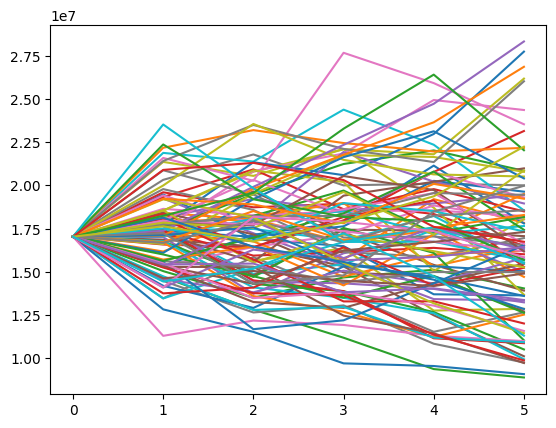

In [451]:
T = 5                             # El período de tiempo durante el cual se generan las trayectorias, en años.
mu = meanventas                # La tasa de retorno esperada del activo, anualizada. 
sigma = sigmaventas         # La volatilidad del activo, anualizada. 
S0 =v0[-1]                 # 'S0' Precio inicial del activo 
NS = 100                        # El número de trayectorias a generar.
M = 5                           # Partición del año en meses (periodicidad) 
St = PathsGBM(S0,mu,sigma,T,NS,M)  # Genera la matriz de la trayectoria de precios
plt.plot(np.transpose(St));

Proyección IPC 

In [452]:
def PathsOU(X0, k, mu, sigma, T, NS, M):
    Z = np.random.normal(0,1,[NS,M])
    dt = T / M
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    for t in range(0,M):
        X[:,t+1] = X[:,t] + k*(mu - X[:,t]) * dt + sigma * np.sqrt(dt) * Z[:,t]
    return X

In [453]:
#Crecimiento IPC
PIPC=IPC.iloc[:].values
CRECIMIENTOIPC = np.zeros(4)
for i in range(len(PIPC)-1):
  CRECIMIENTOIPC[i] =((PIPC[i]/PIPC[i-1])-1)/100
CRECIMIENTOIPC

array([ 0.02411765, -0.00422414, -0.00343284, -0.00136364])

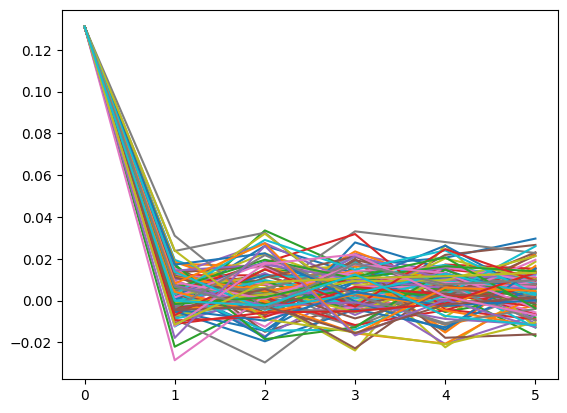

In [454]:
T = 5                           
X0 = IPCreal.iloc[-1]                 
NS = 100                    
M = 5         
k=1  
muIPC=CRECIMIENTOIPC.mean()
sigmaIPC=CRECIMIENTOIPC.std()
IPCS = PathsOU(X0,k,muIPC,sigmaIPC,T,NS,M)  
plt.plot(np.transpose(IPCS));

Proyección TRM

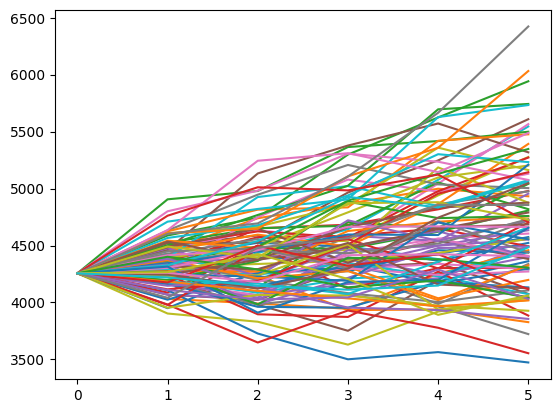

In [455]:
#Cambios en la TRM
sigmaTRM= TRM.std()
sigmaTRM
muTRM = TRM.mean()
muTRM
trm = 4256
T = 5                           
TRM0 = trm     #TRM de 2022 en pesos                 
NS = 100                   
M = 5         
muTRM=0.0196
sigmaTRM=0.050629
TRMS = PathsGBM(TRM0,muTRM,sigmaTRM,T,NS,M)  
plt.plot(np.transpose(TRMS));

Proyección Tx rate

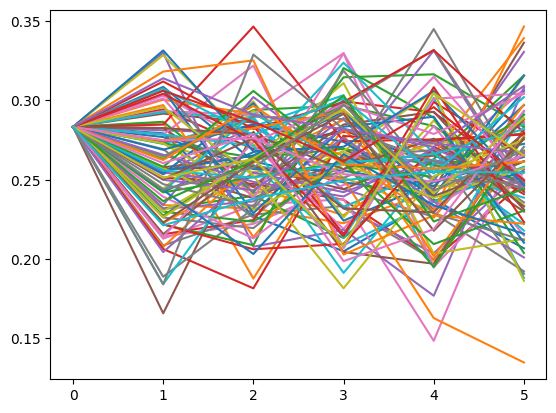

In [456]:
T = 5                           
TRM0 = TX.iloc[-1]     #TRM de 2022 en pesos                 
NS = 100                     
M = 5         
k=1  
sigmaTx=TX.iloc[1:].std()
TxS = PathsOU(TRM0,k,Tx,sigmaTx,T,NS,M)  
plt.plot(np.transpose(TxS));

Se calcula el NOPAT para cada valor de la simulación Monte Carlo

In [458]:
NUEVONOPAT=np.zeros((NS,5))
for i in range(NS):
  NMNOPATP=mean_MEBIT*(1-TxS[i,1:])
  NUEVONOPAT[i,:]=Ventasproyectadas*NMNOPATP

También, se calculan las nuevas ventas proyectadas con el nuevo IPC

In [457]:
N2023=np.zeros(NS)
N2024=np.zeros(NS)
N2025=np.zeros(NS)
N2026=np.zeros(NS)
N2027=np.zeros(NS)

for i in range(NS):
  N2023[i]=v0[-1]*((1+(IPCS[i,1]*propnac))*(1+(TRM.iloc[0]*propint))*(1+(cuotamercado*crecsector)))
  N2024[i]=N2023[0]*((1+(IPCS[i,2]*propnac))*(1+(TRM.iloc[1]*propint))*(1+(cuotamercado*crecsector)))
  N2025[i]=N2024[0]*((1+(IPCS[i,3]*propnac))*(1+(TRM.iloc[2]*propint))*(1+(cuotamercado*crecsector)))
  N2026[i]=N2025[0]*((1+(IPCS[i,4]*propnac))*(1+(TRM.iloc[3]*propint))*(1+(cuotamercado*crecsector)))
  N2027[i]=N2026[0]*((1+(IPCS[i,5]*propnac))*(1+(TRM.iloc[4]*propint))*(1+(cuotamercado*crecsector)))
  NVentasproyectadasIPC=pd.DataFrame([N2023,N2024,N2025,N2026,N2027])
NVentasproyectadasIPC

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.836764e+07,1.852679e+07,1.805776e+07,1.832980e+07,1.827943e+07,1.826946e+07,1.839555e+07,1.844056e+07,1.839063e+07,1.852948e+07,...,1.825928e+07,1.840079e+07,1.828978e+07,1.818172e+07,1.810578e+07,1.825670e+07,1.816985e+07,1.838400e+07,1.817804e+07,1.830737e+07
1,1.865564e+07,1.883355e+07,1.882163e+07,1.896984e+07,1.881002e+07,1.881922e+07,1.867659e+07,1.890958e+07,1.889087e+07,1.887018e+07,...,1.871017e+07,1.914253e+07,1.884047e+07,1.875617e+07,1.912750e+07,1.879122e+07,1.902782e+07,1.877505e+07,1.892411e+07,1.879472e+07
2,1.931848e+07,1.937223e+07,1.922477e+07,1.915638e+07,1.947935e+07,1.924861e+07,1.942968e+07,1.906065e+07,1.943261e+07,1.919622e+07,...,1.926146e+07,1.902103e+07,1.934908e+07,1.915192e+07,1.901420e+07,1.902751e+07,1.947572e+07,1.942410e+07,1.934102e+07,1.936170e+07
3,2.010295e+07,1.995553e+07,2.005276e+07,2.002909e+07,2.015610e+07,2.014424e+07,2.008303e+07,2.013830e+07,1.989746e+07,2.013714e+07,...,1.996183e+07,2.007123e+07,2.024978e+07,1.997694e+07,1.999895e+07,1.997026e+07,2.001837e+07,2.009074e+07,2.013826e+07,1.990291e+07
4,2.072641e+07,2.110395e+07,2.070979e+07,2.101350e+07,2.067060e+07,2.094096e+07,2.084830e+07,2.091633e+07,2.105363e+07,2.095213e+07,...,2.081544e+07,2.087380e+07,2.076676e+07,2.098674e+07,2.064977e+07,2.083505e+07,2.072467e+07,2.093842e+07,2.098487e+07,2.066164e+07


In [459]:
VentasproymodeloIPC1=pd.DataFrame([NVentasproyectadasIPC.iloc[0,:].mean()])
VentasproymodeloIPC2=pd.DataFrame([NVentasproyectadasIPC.iloc[1,:].mean()])
VentasproymodeloIPC3=pd.DataFrame([NVentasproyectadasIPC.iloc[2,:].mean()])
VentasproymodeloIPC4=pd.DataFrame([NVentasproyectadasIPC.iloc[3,:].mean()])
VentasproymodeloIPC5=pd.DataFrame([NVentasproyectadasIPC.iloc[4,:].mean()])
VentasproymodeloIPCtotal = pd.concat([VentasproymodeloIPC1, VentasproymodeloIPC2, VentasproymodeloIPC3,VentasproymodeloIPC4,VentasproymodeloIPC5])

In [512]:
capexproyectadomodeloIPC1 = tasa*VentasproymodeloIPC1
capexproyectadomodeloIPC2 = tasa*VentasproymodeloIPC2
capexproyectadomodeloIPC3 = tasa*VentasproymodeloIPC3
capexproyectadomodeloIPC4 = tasa*VentasproymodeloIPC4
capexproyectadomodeloIPC5 = tasa*VentasproymodeloIPC5
capextotalproyectadoIPC = [capexproyectadomodeloIPC1, capexproyectadomodeloIPC2, capexproyectadomodeloIPC3, capexproyectadomodeloIPC4, capexproyectadomodeloIPC5]
capextotalproyectadoIPC

[               0
 0 -262719.633376,
                0
 0 -270184.123347,
                0
 0 -275925.773773,
                0
 0 -287039.132622,
                0
 0 -298818.353228]

In [520]:
DAproyectadoIPC1 = t*VentasproymodeloIPC1
DAproyectadoIPC2 = t*VentasproymodeloIPC2
DAproyectadoIPC3 = t*VentasproymodeloIPC3
DAproyectadoIPC4 = t*VentasproymodeloIPC4
DAproyectadoIPC5 = t*VentasproymodeloIPC5
DAtotalproyectadoIPC = [DAproyectadoIPC1, DAproyectadoIPC2, DAproyectadoIPC3,DAproyectadoIPC4, DAproyectadoIPC5]
DAtotalproyectadoIPC

[               0
 0  505497.612241,
                0
 0  519860.002323,
                0
 0  530907.484932,
                0
 0  552290.646479,
                0
 0  574954.989504]

In [462]:
#Proyección de costos
MARGENBIPC=VentasproymodeloIPCtotal*mean_MB
CostosproyIPC=VentasproymodeloIPCtotal-MARGENBIPC
CostosproyIPC.columns=["CostosproyIPC"]
CostosproyIPC

,CostosproyIPC
0,1.054395e+07
0,1.084353e+07
0,1.107396e+07
0,1.151998e+07
0,1.199273e+07


In [541]:
NOPATIPC=VentasproymodeloIPCtotal*MNOPATP
NOPATIPC.columns=["NOPAT_IPC"]
NOPATIPC


,NOPAT_IPC
0,1.294128e+06
0,1.330897e+06
0,1.359180e+06
0,1.413923e+06
0,1.471946e+06


In [464]:
#Proyección CUENTAS
CXCIPC=VentasproymodeloIPCtotal*ROTCXC/365
CXPIPC=CostosproyIPC*ROTCXP/365
INVIPC=CostosproyIPC*ROTINV/365


In [465]:
CXCIPC = CXCIPC.iloc[:].values
PROYCXCIPC = np.zeros(5)
for i in range(len(CXCIPC)):
  PROYCXCIPC[i] =CXCIPC[i]-CXCIPC[i-1]
PROYCXCIPC

array([-285061.82223864,   58945.05738641,   45340.25970449,
         87759.18751778,   93017.31762995])

In [466]:
CXPIPC = CXPIPC.iloc[:].values
PROYCXPIPC = np.zeros(5)
for i in range(len(CXPIPC)):
  PROYCXPIPC[i] =CXPIPC[i-1]-CXPIPC[i]
PROYCXPIPC

array([294248.60539809, -60844.69956325, -46801.45549363, -90587.43235128,
       -96015.01798993])

In [467]:
INVIPC=INVIPC.iloc[:].values
PROYINVIPC = np.zeros(5)
for i in range(len(INVIPC)):
  PROYINVIPC[i] =INVIPC[i]-INVIPC[i-1]
PROYINVIPC

array([-328449.55940661,   67916.76968779,   52241.25842729,
        101116.5446419 ,  107174.98664962])

In [491]:
#KTNO IPC
KTNOIPC=pd.DataFrame(PROYCXCIPC+PROYCXPIPC+PROYINVIPC)
KTNOIPC.index=Años
KTNOIPC.columns=(["KTNO_IPC"])
KTNOIPC

,KTNO_IPC
2023,-319262.776247
2024,66017.127511
2025,50780.062638
2026,98288.299808
2027,104177.286290


También, se calculan las nuevas ventas proyectadas con la nueva TRM

In [566]:
N2023=np.zeros(NS)
N2024=np.zeros(NS)
N2025=np.zeros(NS)
N2026=np.zeros(NS)
N2027=np.zeros(NS)

for i in range(NS):
  N2023[i]=v0[-1]*((1+(TRMS[i,1]*propint))*(1+(IPC.iloc[0]*propnac))*(1+(cuotamercado*crecsector)))
  N2024[i]=N2023[0]*((1+(TRMS[i,2]*propint))*(1+(IPC.iloc[1]*propnac))*(1+(cuotamercado*crecsector)))
  N2025[i]=N2024[0]*((1+(TRMS[i,3]*propint))*(1+(IPC.iloc[2]*propnac))*(1+(cuotamercado*crecsector)))
  N2026[i]=N2025[0]*((1+(TRMS[i,4]*propint))*(1+(IPC.iloc[3]*propnac))*(1+(cuotamercado*crecsector)))
  N2027[i]=N2026[0]*((1+(TRMS[i,5]*propint))*(1+(IPC.iloc[4]*propnac))*(1+(cuotamercado*crecsector)))
  NVentasproyectadasTRM=pd.DataFrame([N2023,N2024,N2025,N2026,N2027])
NVentasproyectadasTRM

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.056778e+10,3.196054e+10,3.288634e+10,3.080813e+10,2.982823e+10,2.916069e+10,2.993769e+10,3.144250e+10,3.223411e+10,2.992778e+10,...,3.092511e+10,2.998931e+10,3.154785e+10,2.992862e+10,2.946264e+10,3.043736e+10,3.053610e+10,2.896843e+10,3.058017e+10,3.024421e+10
1,5.490790e+13,5.291657e+13,5.927389e+13,5.812132e+13,5.079112e+13,5.026750e+13,5.074859e+13,5.334462e+13,5.656742e+13,5.541228e+13,...,4.887192e+13,5.125367e+13,5.359946e+13,5.621034e+13,5.031408e+13,5.150394e+13,5.223139e+13,5.599590e+13,5.528607e+13,5.182351e+13
2,9.700362e+16,8.708340e+16,1.172889e+17,1.036546e+17,9.215437e+16,9.534185e+16,9.818771e+16,1.012329e+17,1.005274e+17,1.027681e+17,...,9.252034e+16,8.934278e+16,9.150588e+16,9.568988e+16,8.953742e+16,9.513717e+16,9.773708e+16,1.010659e+17,9.311385e+16,9.103767e+16
3,1.631021e+20,1.534690e+20,2.191385e+20,1.877324e+20,1.641505e+20,1.694227e+20,1.777153e+20,1.895007e+20,1.924962e+20,1.978242e+20,...,1.635697e+20,1.546025e+20,1.634062e+20,1.723746e+20,1.671348e+20,1.848962e+20,1.723526e+20,1.892621e+20,1.516614e+20,1.616615e+20
4,2.851249e+23,2.501761e+23,3.883264e+23,3.253852e+23,2.937443e+23,2.663774e+23,3.009803e+23,3.251856e+23,3.448711e+23,3.623994e+23,...,3.042433e+23,2.626390e+23,2.641808e+23,2.690631e+23,2.635340e+23,3.298795e+23,2.880343e+23,3.173679e+23,2.654603e+23,2.930985e+23


In [567]:
VentasproymodeloTRM1=pd.DataFrame([NVentasproyectadasTRM.iloc[0,:].values.mean()])
VentasproymodeloTRM2=pd.DataFrame([NVentasproyectadasTRM.iloc[1,:].values.mean()])
VentasproymodeloTRM3=pd.DataFrame([NVentasproyectadasTRM.iloc[2,:].values.mean()])
VentasproymodeloTRM4=pd.DataFrame([NVentasproyectadasTRM.iloc[3,:].values.mean()])
VentasproymodeloTRM5=pd.DataFrame([NVentasproyectadasTRM.iloc[4,:].values.mean()])
VentasproymodeloTRMtotal = pd.concat([VentasproymodeloTRM1, VentasproymodeloTRM2, VentasproymodeloTRM3, VentasproymodeloTRM4,VentasproymodeloTRM5])

In [568]:
capexproyectadomodeloTRM1 = tasa*VentasproymodeloTRMtotal.iloc[0]
capexproyectadomodeloTRM2 = tasa*VentasproymodeloTRMtotal.iloc[1]
capexproyectadomodeloTRM3 = tasa*VentasproymodeloTRMtotal.iloc[2]
capexproyectadomodeloTRM4 = tasa*VentasproymodeloTRMtotal.iloc[3]
capexproyectadomodeloTRM5 = tasa*VentasproymodeloTRMtotal.iloc[4]
capextotalproyectadoTRM = [capexproyectadomodeloTRM1[0], capexproyectadomodeloTRM2[0], capexproyectadomodeloTRM3[0], capexproyectadomodeloTRM4[0], capexproyectadomodeloTRM5[0]]

In [569]:
DAproyectadoTRM1 = t*VentasproymodeloTRMtotal.iloc[0]
DAproyectadoTRM2 = t*VentasproymodeloTRMtotal.iloc[1]
DAproyectadoTRM3 = t*VentasproymodeloTRMtotal.iloc[2]
DAproyectadoTRM4 = t*VentasproymodeloTRMtotal.iloc[3]
DAproyectadoTRM5 = t*VentasproymodeloTRMtotal.iloc[4]
DAtotalproyectadoTRM = [DAproyectadoTRM1[0], DAproyectadoTRM2[0], DAproyectadoTRM3[0], DAproyectadoTRM4[0], DAproyectadoTRM5[0]]
DAtotalproyectadoTRM

[854767697.6592112,
 1505486307862.3389,
 2735788559764855.0,
 4.939027377294664e+18,
 8.429461517079607e+21]

In [504]:
#Proyección de costos
MARGENBTRM=VentasproymodeloTRMtotal*mean_MB
CostosproyTRM=VentasproymodeloTRMtotal-MARGENBTRM
CostosproyTRM.columns=["CostosproyTRM"]
CostosproyTRM

,CostosproyTRM
0,2.832759e+10
0,8.012843e+13
0,2.350796e+17
0,6.861143e+20
0,1.894848e+24


In [475]:
CXCTRM=VentasproymodeloTRMtotal*ROTCXC/365
CXPTRM=CostosproyTRM*ROTCXP/365
INVTRM=CostosproyTRM*ROTINV/365


In [570]:
NOPATTRM=VentasproymodeloTRMtotal*MNOPATP
NOPATTRM.columns=["NOPAT_TRM"]
NOPATTRM

,NOPAT_TRM
0,2.188296e+09
0,3.854205e+12
0,7.003910e+15
0,1.264444e+19
0,2.158032e+22


In [476]:
CXCTRM = CXCTRM.iloc[:].values
PROYCXCTRM = np.zeros(5)
for i in range(len(CXCTRM)):
  PROYCXCTRM[i] =CXCTRM[i]-CXCTRM[i-1]
PROYCXCTRM

array([-3.72829948e+23,  1.57604824e+13,  4.62384491e+16,  1.34953481e+20,
        3.72694948e+23])

In [477]:
CXPTRM = CXPTRM.iloc[:].values
PROYCXPTRM = np.zeros(5)
for i in range(len(CXPTRM)):
  PROYCXPTRM[i] =CXPTRM[i-1]-CXPTRM[i]
PROYCXPTRM

array([ 3.84845264e+23, -1.62684008e+13, -4.77285912e+16, -1.39302673e+20,
       -3.84705914e+23])

In [478]:
INVTRM = INVTRM.iloc[:].values
PROYINVTRM = np.zeros(5)
for i in range(len(INVTRM)):
  PROYINVTRM[i] =INVTRM[i]-INVTRM[i-1]
PROYINVTRM

array([-4.29576403e+23,  1.81593012e+13,  5.32761565e+16,  1.55494030e+20,
        4.29420855e+23])

In [479]:
#KTNO TRM
KTNOTRM=pd.DataFrame(PROYCXCTRM+PROYCXPTRM+PROYINVTRM)
KTNOTRM.index=Años
KTNOTRM.columns=(["KTNO_TRM"])
KTNOTRM=KTNOTRM.iloc[:].values

In [480]:
capextotalproyectadoTRM

[-705828005.0913401,
 -1996529871030.6465,
 -5857388908895088.0,
 -1.7095651734683433e+19,
 -4.72132105782561e+22]

In [571]:
NOPATTRM=NOPATTRM.iloc[:].values
FCFTRM=NOPATTRM-KTNOTRM+DAtotalproyectadoTRM+capextotalproyectadoTRM
FCFTRM

array([[ 4.17561087e+23,  4.17561087e+23,  4.17561088e+23,
         4.17563459e+23,  4.21609548e+23],
       [-1.37967672e+13, -1.30741300e+13,  1.30013429e+15,
         2.37207868e+18,  4.04846150e+21],
       [-4.47821042e+16, -4.47813816e+16, -4.34681732e+16,
         2.32731037e+18,  4.04841673e+21],
       [-1.38500403e+20, -1.38500402e+20, -1.38499089e+20,
        -1.36128311e+20,  3.90996111e+21],
       [-3.95829572e+23, -3.95829572e+23, -3.95829570e+23,
        -3.95827200e+23, -3.91781110e+23]])

In [575]:
KTNOTRM

array([[-4.17561087e+23],
       [ 1.76513829e+13],
       [ 5.17860144e+16],
       [ 1.51144839e+20],
       [ 4.17409890e+23]])

In [552]:
KTNOIPC=KTNOIPC.iloc[:].values

In [549]:
NOPATIPC=NOPATIPC.iloc[:].values
FCFIC=NOPATIPC-KTNOIPC+DAtotalproyectadoIPC+capextotalproyectadoIPC
FCFIC

array([[[1856168.42400088],
        [1507657.7669168 ],
        [1551177.5626454 ],
        [1558412.4940601 ],
        [1610546.63705809]],

       [[1863066.32411265],
        [1514555.66702857],
        [1558075.46275717],
        [1565310.39417187],
        [1617444.53716986]],

       [[1868372.15629521],
        [1519861.49921113],
        [1563381.29493973],
        [1570616.22635443],
        [1622750.36935242]],

       [[1878641.95899333],
        [1530131.30190926],
        [1573651.09763785],
        [1580886.02905256],
        [1633020.17205055]],

       [[1889527.08141285],
        [1541016.42432877],
        [1584536.22005737],
        [1591771.15147207],
        [1643905.29447006]]])

Se calcula el valor de la acción en diferentes escenarios

In [550]:
F2023=FCFIC[0].mean()
F2024=FCFIC[1].mean()
F2025=FCFIC[2].mean()
F2026=FCFIC[3].mean()
F2027=FCFIC[4].mean()

In [551]:
ValoropactivosIPC=VPN(F2023,F2024,F2025,F2026,F2027,g,WACCP)
vactivosIPC=ValoropactivosIPC+activosotros[-1]
vequityIPC=vactivosIPC-ob[-1]
VaccionIPC=vequityIPC/acciones
VaccionIPC

8816.507592691238

Se puede concluir que la el valor inicial de la acción es mayor que el valor con diferentes valores de IPC